In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()

In [3]:
len(xtrain)

60000

In [4]:
len(ytrain)

60000

In [5]:
len(xtest)

10000

In [6]:
len(ytest)

10000

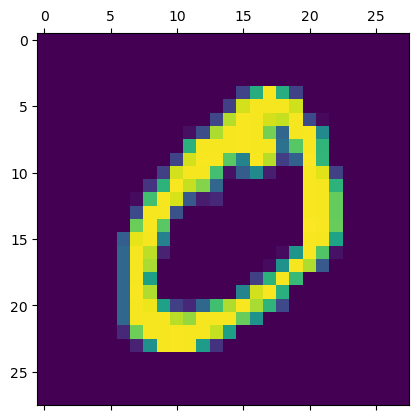

In [7]:
plt.matshow(xtrain[1])

In [8]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
xtrain.shape

(60000, 28, 28)

In [10]:
ytrain.shape

(60000,)

In [11]:
xtest.shape

(10000, 28, 28)

In [12]:
ytest.shape

(10000,)

In [13]:
xtrain = xtrain / 255
xtest = xtest / 255

In [14]:
xtrain_flattened=xtrain.reshape(len(xtrain),28*28)
xtest_flattened=xtest.reshape(len(xtest),28*28)

In [15]:
xtrain_flattened.shape

(60000, 784)

In [16]:
xtest_flattened.shape

(10000, 784)

In [17]:
xtrain_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
                )

model.fit(xtrain_flattened,ytrain,epochs=5)


Epoch 1/5
 135/1875 [=>............................] - ETA: 0s - loss: 1.2931 - accuracy: 0.6627  

2023-11-10 18:17:36.618260: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 346us/step - loss: 0.4685 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 1s 346us/step - loss: 0.3033 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 1s 345us/step - loss: 0.2828 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 1s 376us/step - loss: 0.2733 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 1s 347us/step - loss: 0.2664 - accuracy: 0.9260


In [20]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
                )

model.fit(xtrain_flattened,ytrain,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 1s 344us/step - loss: 0.4717 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 1s 342us/step - loss: 0.3039 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 1s 343us/step - loss: 0.2836 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 347us/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 345us/step - loss: 0.2666 - accuracy: 0.9257


In [21]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 0s 300us/step - loss: 0.2677 - accuracy: 0.9274


[0.2676975429058075, 0.9273999929428101]

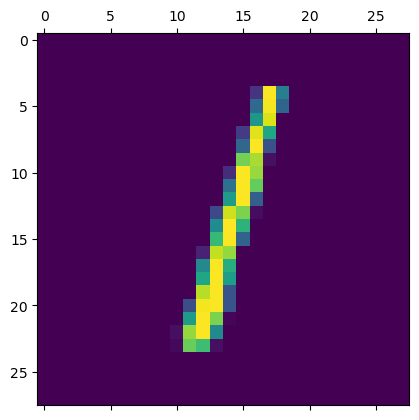

In [22]:
plt.matshow(xtest[2])

In [36]:
y_predicted=model.predict(xtest_flattened)

313/313 [==============================] - 0s 313us/step


In [37]:
y_predicted[0]

array([5.8231334e-04, 6.5364336e-05, 1.2745140e-01, 8.8084847e-01,
       3.5554791e-07, 1.9606596e-02, 1.6951674e-06, 9.9995810e-01,
       6.1812025e-02, 4.7494933e-01], dtype=float32)

In [38]:
np.argmax(y_predicted[2])

1

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [40]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    1,    0,    0,    8,    0,    3,    3],
       [   0, 1119,    4,    0,    0,    1,    4,    4,    3,    0],
       [   3,    0, 1014,    1,    1,    1,    3,    4,    5,    0],
       [   2,    0,   12,  970,    0,   14,    1,    6,    3,    2],
       [   0,    0,    6,    1,  950,    0,    8,    3,    2,   12],
       [   1,    0,    0,    4,    0,  873,   11,    1,    1,    1],
       [   2,    3,    0,    1,    2,    2,  948,    0,    0,    0],
       [   1,    1,   12,    1,    1,    0,    0, 1004,    2,    6],
       [   6,    0,    7,    2,    3,    5,    7,    4,  936,    4],
       [   1,    4,    1,    6,    5,    4,    2,    5,    1,  980]],
      dtype=int32)>

In [29]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'Truth')

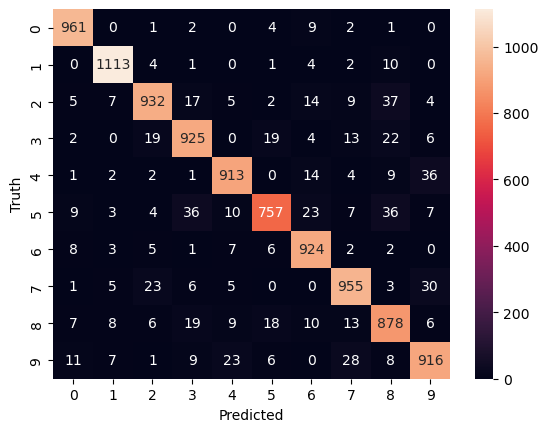

In [30]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

In [32]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
                )

model.fit(xtrain_flattened,ytrain,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 1s 495us/step - loss: 0.2786 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 1s 492us/step - loss: 0.1244 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 1s 493us/step - loss: 0.0856 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 1s 494us/step - loss: 0.0647 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 1s 493us/step - loss: 0.0510 - accuracy: 0.9840


In [33]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 0s 372us/step - loss: 0.0837 - accuracy: 0.9757


[0.08372892439365387, 0.9757000207901001]

Text(50.722222222222214, 0.5, 'Truth')

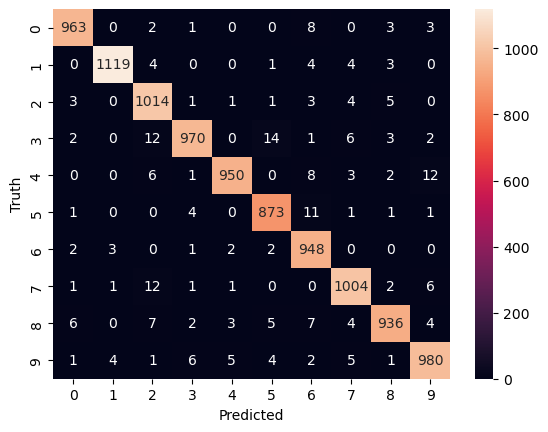

In [43]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

In [50]:
# Flattening with Keras 

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Flattening 
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='apdam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
                )

model.fit(xtrain,ytrain,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 1s 498us/step - loss: 0.2723 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 1s 492us/step - loss: 0.1258 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 1s 492us/step - loss: 0.0872 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 1s 494us/step - loss: 0.0662 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 1s 493us/step - loss: 0.0518 - accuracy: 0.9837
